In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_wavelengths(dataframe, wavelength_range = None): # dataframe to be well = row, have to give wavelength actually
    wavelengths = np.asarray(dataframe.iloc[0])
    
    if len(wavelength_range) == 2:
        lower_index = np.where(wavelengths == wavelength_range[0])[0][0]
        upper_index = np.where(wavelengths == wavelength_range[1])[0][0]
        dataframe = dataframe 

        fig, ax = plt.subplots()
        for key, row in dataframe.iterrows():
            if key == 'Wavelength':
                x = row[lower_index:upper_index]
            else: 
                y = row[lower_index:upper_index]
                ax.plot(x,y)
        
    elif len(wavelength_range) == 1:
        wavelength = wavelength_range[0]
        index = np.where(wavelengths == wavelength)[0][0]
        wells = []
        absorbances = []
        for i, (key, row) in enumerate(dataframe.iterrows()):
            if key == 'Wavelength':
                pass
            else:
                well = key
                wells.append(well)
                absorbance = row[index]
                absorbances.append(absorbance)

        absorbances_nm_max = [a/max(absorbances) for a in absorbances]

        plt.scatter(range(len(wells)), absorbances, s = 20, alpha = 0.5, marker = 'o', color = 'r') # in order for sample creation and analysis 
        plt.xlabel('Well Index')
        plt.ylabel('Absorbance')
    
    else:
        fig, ax = plt.subplots()
        for key, row in dataframe.iterrows():
            if key == 'Wavelength':
                x = row
            else: 
                y = row
                ax.plot(x,y)

In [4]:
# splitting up into dfs so can rearrange in column order
def r_to_c_order(df):    
    key = df.iloc[0]
    A = df.iloc[1:9]
    B = df.iloc[9:17]
    C = df.iloc[17:25]
    D = df.iloc[25:33]
    E = df.iloc[33:41]
    F = df.iloc[41:49]

    concat = [key]
    for i in range(8):
    #     print(A.iloc[i])
        concat.append(A.iloc[i])
        concat.append(B.iloc[i])
        concat.append(C.iloc[i])
        concat.append(D.iloc[i])
        concat.append(E.iloc[i])
        concat.append(F.iloc[i])
    

    final_df = pd.concat(concat, axis =1) # ok so now can begin to match the sample dataframe with this data frame\
    return final_df.T

In [5]:
def baseline_correction(df_samples, baseline_series):
# here is where you will specify up to what wells are samples and which is a blank, 
# ideally build into sample creation code an automatic blank so not nec. 
    new_df_con = []
    for key, row in df_samples.iterrows():
        if key == 'Wavelength':
            wavelengths = row
            new_df_con.append(wavelengths)
        else: 
            series = row 
            corrected = series.subtract(baseline_series)
            new_df_con.append(corrected)
    
    baseline_corrected_df = pd.concat(new_df_con, axis = 1)
    return baseline_corrected_df.T

In [6]:
df1 =  pd.read_excel(r"C:\Users\Edwin\Desktop\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Run_09_24_20\09_24_2020_Scan1_Trial1.xlsx", sheet_name = 'Sheet1' ).T
# df2 =  pd.read_excel(r"C:\Users\Edwin\Desktop\Repos\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Run 0917\09_17_20_E_P_Scan_2.xlsx", sheet_name = 'Sheet1' ).T

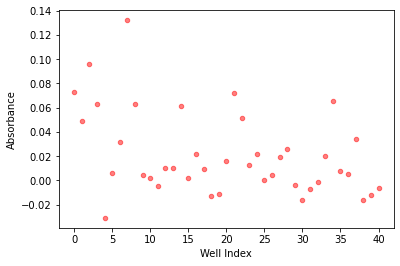

In [10]:
plot_wavelengths(df1[0:42],[300])

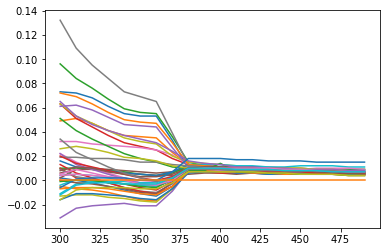

In [14]:
plot_wavelengths(df1,[300,500])